In [41]:
# !pip install git+https://github.com/Animadversio/pykan.git

  Cloning https://github.com/Animadversio/pykan.git to /tmp/pip-req-build-64sn2z8w
  Running command git clone --filter=blob:none --quiet https://github.com/Animadversio/pykan.git /tmp/pip-req-build-64sn2z8w
  Resolved https://github.com/Animadversio/pykan.git to commit f91bf03c444fa0be11ad692ff5c61c174a50f062
  Preparing metadata (setup.py) ... done
  Created wheel for pykan: filename=pykan-0.0.5-py3-none-any.whl size=44470 sha256=a74ccab4a95d6e3a682b7e14a5f725e4877fd523e86fc78246fc0a472fcbd13a
  Stored in directory: /tmp/pip-ephem-wheel-cache-bhkmq612/wheels/68/f9/4f/567bd121c1dc9c8ad412718b0085630baf700072a96bb84981
Successfully built pykan


In [1]:
import os
import sys
from os.path import join
import json
import pickle as pkl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [2]:
data_root = r"/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Datasets/single_neurons_DNN_train"
batchdirs = sorted([join(data_root, d) for d in os.listdir(data_root) if os.path.isdir(join(data_root, d))])

In [ ]:
!ls $STORE_DIR/Datasets/single_neurons_DNN_train

full_ergodic_train_batch_1   full_ergodic_train_batch_5
full_ergodic_train_batch_10  full_ergodic_train_batch_6
full_ergodic_train_batch_2   full_ergodic_train_batch_7
full_ergodic_train_batch_3   full_ergodic_train_batch_8
full_ergodic_train_batch_4   full_ergodic_train_batch_9


In [7]:
!echo $STORE_DIR/Datasets/single_neurons_DNN_train

/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Datasets/single_neurons_DNN_train


In [16]:
!ls {batchdirs[0]}

'L5PC_sim__Output_spikes_0722__Input_ranges_Exc_[0124,1128]_Inh_[0055,1287]_per100ms__simXsec_128x6_randseed_600041.p'
'L5PC_sim__Output_spikes_0729__Input_ranges_Exc_[0119,1138]_Inh_[0041,1296]_per100ms__simXsec_128x6_randseed_800102.p'
'L5PC_sim__Output_spikes_0732__Input_ranges_Exc_[0118,1157]_Inh_[0035,1293]_per100ms__simXsec_128x6_randseed_500147.p'
'L5PC_sim__Output_spikes_0740__Input_ranges_Exc_[0134,1145]_Inh_[0060,1285]_per100ms__simXsec_128x6_randseed_500201.p'
'L5PC_sim__Output_spikes_0741__Input_ranges_Exc_[0146,1184]_Inh_[0060,1352]_per100ms__simXsec_128x6_randseed_400102.p'
'L5PC_sim__Output_spikes_0748__Input_ranges_Exc_[0112,1126]_Inh_[0036,1288]_per100ms__simXsec_128x6_randseed_800130.p'
'L5PC_sim__Output_spikes_0769__Input_ranges_Exc_[0123,1149]_Inh_[0039,1301]_per100ms__simXsec_128x6_randseed_1110116.p'
'L5PC_sim__Output_spikes_0771__Input_ranges_Exc_[0121,1162]_Inh_[0047,1308]_per100ms__simXsec_128x6_randseed_1110273.p'
'L5PC_sim__Output_spikes_0774__Input_ranges_Ex

In [3]:
data_fps = glob(join(batchdirs[0], "*.p"))

In [15]:
data = pkl.load(open(data_fps[0], "rb"))

In [16]:
list(data.keys())

['Params', 'Results']

In [18]:
print(list(data['Params']))

['random_seed', 'numSimulations', 'totalSimDurationInSec', 'morphology_description', 'segments_to_keep', 'segments_to_drop', 'gmax_NMDA_to_AMPA_ratio', 'Ih_vshift', 'SKE2_mult_factor', 'keep_probability_below_01_output_spikes', 'keep_probability_above_24_output_spikes', 'max_output_spikes_to_keep_per_sim', 'max_spikes_mult_factor_per_active_segment', 'max_spikes_mult_factor_per_NMDA_g_ratio', 'inh_max_delta_spikes_mult_factor_per_NMDA_g_ratio', 'exc_max_spikes_mult_factor', 'inh_max_delta_spikes_mult_factor', 'numSamplesPerMS_HighRes', 'inst_rate_sampling_time_interval_options_ms', 'temporal_inst_rate_smoothing_sigma_options_ms', 'inst_rate_sampling_time_interval_jitter_range', 'temporal_inst_rate_smoothing_sigma_jitter_range', 'num_bas_ex_spikes_per_100ms_range', 'num_bas_ex_inh_spike_diff_per_100ms_range', 'num_apic_ex_spikes_per_100ms_range', 'num_apic_ex_inh_spike_diff_per_100ms_range', 'collectAndSaveDVTs', 'allSectionsType', 'allSections_DistFromSoma', 'allSectionsLength', 'allSe

In [19]:
print(list(data['Results']))

['listOfSingleSimulationDicts']


In [22]:
type(data['Results']['listOfSingleSimulationDicts'])

list

In [23]:
list(data['Results']['listOfSingleSimulationDicts'][0])

['recordingTimeHighRes',
 'somaVoltageHighRes',
 'nexusVoltageHighRes',
 'recordingTimeLowRes',
 'somaVoltageLowRes',
 'nexusVoltageLowRes',
 'exInputSpikeTimes',
 'inhInputSpikeTimes',
 'outputSpikeTimes']

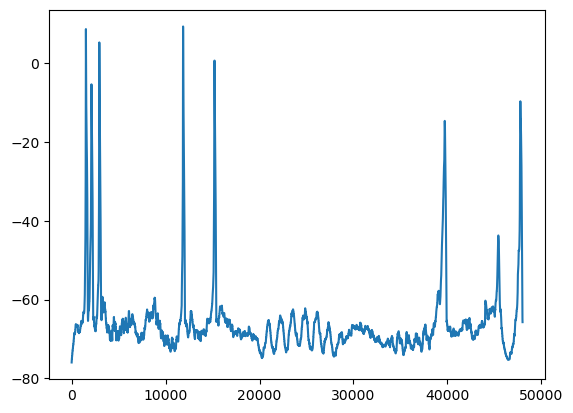

In [28]:
plt.plot(data['Results']['listOfSingleSimulationDicts'][0]['nexusVoltageHighRes'])

In [29]:
def dict_to_scatter_data(data):
    """
    Convert dictionary data to x and y values for scatter plot.

    Parameters:
    data (dict): Dictionary where keys are y-values and values are lists of x-values.

    Returns:
    tuple: Two lists, x_values and y_values, for plotting.
    """
    x_values = []
    y_values = []

    for key, values in data.items():
        y_values.extend([key] * len(values))
        x_values.extend(values)

    return x_values, y_values

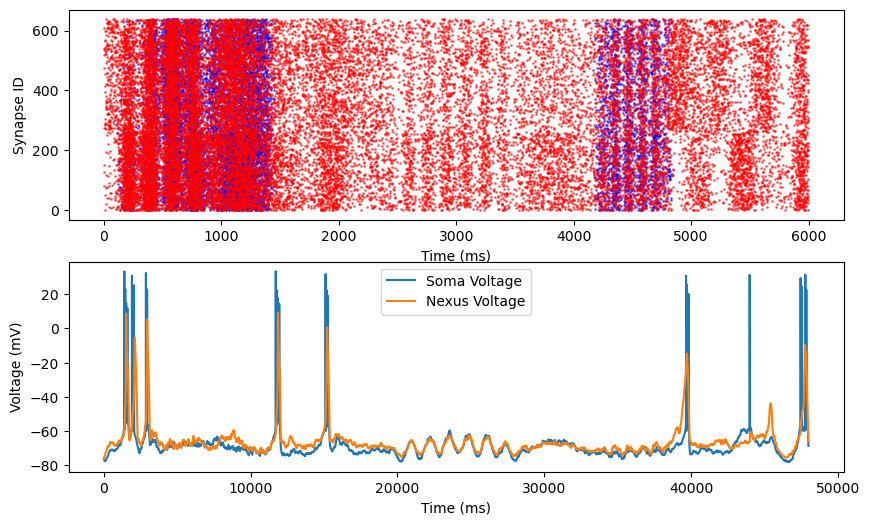

In [40]:
volt_trace_soma = data['Results']['listOfSingleSimulationDicts'][0]['somaVoltageHighRes']
volt_trace_nexus = data['Results']['listOfSingleSimulationDicts'][0]['nexusVoltageHighRes']
spike_bin_inh, spike_ID_inh = dict_to_scatter_data(data['Results']['listOfSingleSimulationDicts'][0]['inhInputSpikeTimes'])
spike_bin_exc, spike_ID_exc = dict_to_scatter_data(data['Results']['listOfSingleSimulationDicts'][0]['exInputSpikeTimes'])
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.scatter(spike_bin_inh, spike_ID_inh, s=1, color="blue", alpha=0.5)
plt.scatter(spike_bin_exc, spike_ID_exc, s=1, color="red", alpha=0.5)
plt.xlabel('Time (ms)')
plt.ylabel('Synapse ID')
plt.subplot(2, 1, 2)
plt.plot(volt_trace_soma)
plt.plot(volt_trace_nexus)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.legend(['Soma Voltage', 'Nexus Voltage'])
plt.show()

In [19]:
import time
import pickle

def bin2dict(bin_spikes_matrix):
    spike_row_inds, spike_times = np.nonzero(bin_spikes_matrix)
    row_inds_spike_times_map = {}
    for row_ind, syn_time in zip(spike_row_inds,spike_times):
        if row_ind in row_inds_spike_times_map.keys():
            row_inds_spike_times_map[row_ind].append(syn_time)
        else:
            row_inds_spike_times_map[row_ind] = [syn_time]

    return row_inds_spike_times_map


def dict2bin(row_inds_spike_times_map, num_segments, sim_duration_ms):
    
    bin_spikes_matrix = np.zeros((num_segments, sim_duration_ms), dtype='bool')
    for row_ind in row_inds_spike_times_map.keys():
        for spike_time in row_inds_spike_times_map[row_ind]:
            bin_spikes_matrix[row_ind,spike_time] = 1.0
    
    return bin_spikes_matrix


def parse_sim_experiment_file(sim_experiment_file):
    
    print('-----------------------------------------------------------------')
    print("loading file: '" + sim_experiment_file.split("\\")[-1] + "'")
    loading_start_time = time.time()
    experiment_dict = pickle.load(open(sim_experiment_file, "rb" ), encoding='latin1')
    
    # gather params
    num_simulations = len(experiment_dict['Results']['listOfSingleSimulationDicts'])
    num_segments    = len(experiment_dict['Params']['allSegmentsType'])
    sim_duration_ms = experiment_dict['Params']['totalSimDurationInSec'] * 1000
    num_ex_synapses  = num_segments
    num_inh_synapses = num_segments
    num_synapses = num_ex_synapses + num_inh_synapses
    
    # collect X, y_spike, y_soma
    X = np.zeros((num_synapses,sim_duration_ms,num_simulations), dtype='bool')
    y_spike = np.zeros((sim_duration_ms,num_simulations))
    y_soma  = np.zeros((sim_duration_ms,num_simulations))
    for k, sim_dict in enumerate(experiment_dict['Results']['listOfSingleSimulationDicts']):
        X_ex  = dict2bin(sim_dict['exInputSpikeTimes'] , num_segments, sim_duration_ms)
        X_inh = dict2bin(sim_dict['inhInputSpikeTimes'], num_segments, sim_duration_ms)
        X[:,:,k] = np.vstack((X_ex,X_inh))
        spike_times = (sim_dict['outputSpikeTimes'].astype(float) - 0.5).astype(int)
        y_spike[spike_times,k] = 1.0
        y_soma[:,k] = sim_dict['somaVoltageLowRes']

    loading_duration_sec = time.time() - loading_start_time
    print('loading took %.3f seconds' %(loading_duration_sec))
    print('-----------------------------------------------------------------')

    return X, y_spike, y_soma


def parse_sim_experiment_file_with_DVT(sim_experiment_file, DVT_PCA_model=None, print_logs=False):
    
    if print_logs:
        print('-----------------------------------------------------------------')
        print("loading file: '" + sim_experiment_file.split("\\")[-1] + "'")
        loading_start_time = time.time()
        
    if sys.version_info[0]<3:
        experiment_dict = pickle.load(open(sim_experiment_file, "rb" ))
    else:
        experiment_dict = pickle.load(open(sim_experiment_file, "rb" ),encoding='latin1')
    
    # gather params
    num_simulations = len(experiment_dict['Results']['listOfSingleSimulationDicts'])
    num_segments    = len(experiment_dict['Params']['allSegmentsType'])
    sim_duration_ms = experiment_dict['Params']['totalSimDurationInSec'] * 1000
    num_ex_synapses  = num_segments
    num_inh_synapses = num_segments
    num_synapses = num_ex_synapses + num_inh_synapses
    
    # collect X, y_spike, y_soma
    X = np.zeros((num_synapses,sim_duration_ms,num_simulations), dtype='bool')
    y_spike = np.zeros((sim_duration_ms,num_simulations))
    y_soma  = np.zeros((sim_duration_ms,num_simulations))
    
    # if we recive PCA model of DVTs, then output the projection on that model, else return the full DVTs
    if DVT_PCA_model is not None:
        num_components = DVT_PCA_model.n_components
        y_DVTs  = np.zeros((num_components,sim_duration_ms,num_simulations), dtype=np.float32)
    else:
        y_DVTs  = np.zeros((num_segments,sim_duration_ms,num_simulations), dtype=np.float16)
    
    # go over all simulations in the experiment and collect their results
    for k, sim_dict in enumerate(experiment_dict['Results']['listOfSingleSimulationDicts']):
        X_ex  = dict2bin(sim_dict['exInputSpikeTimes'] , num_segments, sim_duration_ms)
        X_inh = dict2bin(sim_dict['inhInputSpikeTimes'], num_segments, sim_duration_ms)
        X[:,:,k] = np.vstack((X_ex,X_inh))
        spike_times = (sim_dict['outputSpikeTimes'].astype(float) - 0.5).astype(int)
        y_spike[spike_times,k] = 1.0
        y_soma[:,k] = sim_dict['somaVoltageLowRes']
        
        # if we recive PCA model of DVTs, then output the projection on that model, else return the full DVTs
        curr_DVTs = sim_dict['dendriticVoltagesLowRes']
        # clip the DVTs (to mainly reflect synaptic input and NMDA spikes (battery ~0mV) and diminish importance of bAP and calcium spikes)
        curr_DVTs[curr_DVTs > 2.0] = 2.0
        if DVT_PCA_model is not None:
            y_DVTs[:,:,k] = DVT_PCA_model.transform(curr_DVTs.T).T
        else:
            y_DVTs[:,:,k] = curr_DVTs
        
    if print_logs:
        loading_duration_sec = time.time() - loading_start_time
        print('loading took %.3f seconds' %(loading_duration_sec))
        print('-----------------------------------------------------------------')

    return X, y_spike, y_soma, y_DVTs

# helper function to select random {X,y} window pairs from dataset
def sample_windows_from_sims(sim_experiment_files, batch_size=16, window_size_ms=400, ignore_time_from_start=500, file_load=0.5, 
                             DVT_PCA_model=None, y_train_soma_bias=-67.7, y_soma_threshold=-55.0, y_DTV_threshold=3.0):
    
    while True:
        # randomly sample simulation file
        sim_experiment_file = np.random.choice(sim_experiment_files,size=1)[0]
        print('from %d files loading "%s"' %(len(sim_experiment_files),sim_experiment_file))
        X, y_spike, y_soma, y_DVT = parse_sim_experiment_file_with_DVT(sim_experiment_file, DVT_PCA_model=DVT_PCA_model)
        
        # reshape to what is needed
        X  = np.transpose(X,axes=[2,1,0])
        y_spike = y_spike.T[:,:,np.newaxis]
        y_soma  = y_soma.T[:,:,np.newaxis]
        y_DVT   = np.transpose(y_DVT,axes=[2,1,0])

        # threshold the signals
        y_soma[y_soma > y_soma_threshold] = y_soma_threshold
        y_DVT[y_DVT > y_DTV_threshold] = y_DTV_threshold
        y_DVT[y_DVT < -y_DTV_threshold] = -y_DTV_threshold

        y_soma = y_soma - y_train_soma_bias
        
        # gather information regarding the loaded file
        num_simulations, sim_duration_ms, num_segments = X.shape
        num_output_channels_y1 = y_spike.shape[2]
        num_output_channels_y2 = y_soma.shape[2]
        num_output_channels_y3 = y_DVT.shape[2]
        
        # determine how many batches in total can enter in the file
        max_batches_per_file = (num_simulations * sim_duration_ms) / (batch_size * window_size_ms)
        batches_per_file     = int(file_load * max_batches_per_file)
        
        print('file load = %.4f, max batches per file = %d' %(file_load, max_batches_per_file))
        print('num batches per file = %d. coming from (%dx%d),(%dx%d)' %(batches_per_file, num_simulations, sim_duration_ms,
                                                                         batch_size, window_size_ms))
        
        for batch_ind in range(batches_per_file):
            # randomly sample simulations for current batch
            selected_sim_inds = np.random.choice(range(num_simulations),size=batch_size,replace=True)
            
            # randomly sample timepoints for current batch
            sampling_start_time = max(ignore_time_from_start, window_size_ms)
            selected_time_inds = np.random.choice(range(sampling_start_time,sim_duration_ms),size=batch_size,replace=False)
            
            # gather batch and yield it
            X_batch       = np.zeros((batch_size, window_size_ms, num_segments))
            y_spike_batch = np.zeros((batch_size, window_size_ms, num_output_channels_y1))
            y_soma_batch  = np.zeros((batch_size, window_size_ms, num_output_channels_y2))
            y_DVT_batch   = np.zeros((batch_size, window_size_ms, num_output_channels_y3))
            for k, (sim_ind, win_time) in enumerate(zip(selected_sim_inds, selected_time_inds)):
                X_batch[k,:,:]       = X[sim_ind,win_time - window_size_ms:win_time,:]
                y_spike_batch[k,:,:] = y_spike[sim_ind,win_time - window_size_ms:win_time,:]
                y_soma_batch[k,:,:]  = y_soma[sim_ind,win_time - window_size_ms:win_time,:]
                y_DVT_batch[k,:,:]   = y_DVT[sim_ind,win_time - window_size_ms:win_time,:]
            
            yield (X_batch, [y_spike_batch, y_soma_batch, y_DVT_batch])

In [20]:

# helper function to select random {X,y} window pairs from dataset
def sample_windows_from_sims_noDVT(sim_experiment_files, batch_size=16, window_size_ms=400, ignore_time_from_start=500, file_load=0.5, 
                             DVT_PCA_model=None, y_train_soma_bias=-67.7, y_soma_threshold=-55.0, y_DTV_threshold=3.0):
    
    while True:
        # randomly sample simulation file
        sim_experiment_file = np.random.choice(sim_experiment_files,size=1)[0]
        print('from %d files loading "%s"' %(len(sim_experiment_files),sim_experiment_file))
        X, y_spike, y_soma = parse_sim_experiment_file(sim_experiment_file, )
        
        # reshape to what is needed
        X  = np.transpose(X,axes=[2,1,0])
        y_spike = y_spike.T[:,:,np.newaxis]
        y_soma  = y_soma.T[:,:,np.newaxis]
        # y_DVT   = np.transpose(y_DVT,axes=[2,1,0])

        # threshold the signals
        y_soma[y_soma > y_soma_threshold] = y_soma_threshold
        # y_DVT[y_DVT > y_DTV_threshold] = y_DTV_threshold
        # y_DVT[y_DVT < -y_DTV_threshold] = -y_DTV_threshold

        y_soma = y_soma - y_train_soma_bias
        
        # gather information regarding the loaded file
        num_simulations, sim_duration_ms, num_segments = X.shape
        num_output_channels_y1 = y_spike.shape[2]
        num_output_channels_y2 = y_soma.shape[2]
        # num_output_channels_y3 = y_DVT.shape[2]
        
        # determine how many batches in total can enter in the file
        max_batches_per_file = (num_simulations * sim_duration_ms) / (batch_size * window_size_ms)
        batches_per_file     = int(file_load * max_batches_per_file)
        
        print('file load = %.4f, max batches per file = %d' %(file_load, max_batches_per_file))
        print('num batches per file = %d. coming from (%dx%d),(%dx%d)' %(batches_per_file, num_simulations, sim_duration_ms,
                                                                         batch_size, window_size_ms))
        
        for batch_ind in range(batches_per_file):
            # randomly sample simulations for current batch
            selected_sim_inds = np.random.choice(range(num_simulations),size=batch_size,replace=True)
            
            # randomly sample timepoints for current batch
            sampling_start_time = max(ignore_time_from_start, window_size_ms)
            selected_time_inds = np.random.choice(range(sampling_start_time,sim_duration_ms),size=batch_size,replace=False)
            
            # gather batch and yield it
            X_batch       = np.zeros((batch_size, window_size_ms, num_segments))
            y_spike_batch = np.zeros((batch_size, window_size_ms, num_output_channels_y1))
            y_soma_batch  = np.zeros((batch_size, window_size_ms, num_output_channels_y2))
            # y_DVT_batch   = np.zeros((batch_size, window_size_ms, num_output_channels_y3))
            for k, (sim_ind, win_time) in enumerate(zip(selected_sim_inds, selected_time_inds)):
                X_batch[k,:,:]       = X[sim_ind,win_time - window_size_ms:win_time,:]
                y_spike_batch[k,:,:] = y_spike[sim_ind,win_time - window_size_ms:win_time,:]
                y_soma_batch[k,:,:]  = y_soma[sim_ind,win_time - window_size_ms:win_time,:]
                # y_DVT_batch[k,:,:]   = y_DVT[sim_ind,win_time - window_size_ms:win_time,:]
            
            yield (X_batch, [y_spike_batch, y_soma_batch, ]) # y_DVT_batch

In [14]:
train_files = glob(data_root + '/*/*_6_secDuration_*')[:1]

In [15]:
train_files

[]

In [22]:
for X_batch, (y_spike_batch, y_soma_batch) in sample_windows_from_sims_noDVT(data_fps, batch_size=16, 
                    window_size_ms=400, ignore_time_from_start=500, file_load=0.5, DVT_PCA_model=None, 
                    y_train_soma_bias=-67.7, y_soma_threshold=-55.0, y_DTV_threshold=3.0):
    break

from 10 files loading "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Datasets/single_neurons_DNN_train/full_ergodic_train_batch_1/L5PC_sim__Output_spikes_0769__Input_ranges_Exc_[0123,1149]_Inh_[0039,1301]_per100ms__simXsec_128x6_randseed_1110116.p"
-----------------------------------------------------------------
loading file: '/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Datasets/single_neurons_DNN_train/full_ergodic_train_batch_1/L5PC_sim__Output_spikes_0769__Input_ranges_Exc_[0123,1149]_Inh_[0039,1301]_per100ms__simXsec_128x6_randseed_1110116.p'
loading took 15.344 seconds
-----------------------------------------------------------------
file load = 0.5000, max batches per file = 120
num batches per file = 60. coming from (128x6000),(16x400)


In [24]:
X_batch.shape, y_spike_batch.shape, y_soma_batch.shape

((16, 400, 1278), (16, 400, 1), (16, 400, 1))

In [ ]:
def create_temporaly_convolutional_model(max_input_window_size, num_segments, num_syn_types, num_DVT_outputs,
                                                                                             filter_sizes_per_layer,
                                                                                             num_filters_per_layer,
                                                                                             activation_function_per_layer,
                                                                                             l2_regularization_per_layer,
                                                                                             strides_per_layer,
                                                                                             dilation_rates_per_layer,
                                                                                             initializer_per_layer):
    
    # define input and flatten it
    binary_input_mat = Input(shape=(max_input_window_size, num_segments * num_syn_types), name='input_layer')

    for k in range(len(filter_sizes_per_layer)):
        num_filters   = num_filters_per_layer[k]
        filter_size   = filter_sizes_per_layer[k]
        activation    = activation_function_per_layer[k]
        l2_reg        = l2_regularization_per_layer[k]
        stride        = strides_per_layer[k]
        dilation_rate = dilation_rates_per_layer[k]
        initializer   = initializer_per_layer[k]
        
        if activation == 'lrelu':
            leaky_relu_slope = 0.25
            activation = lambda x: LeakyReLU(alpha=leaky_relu_slope)(x)
            print('leaky relu slope = %.4f' %(leaky_relu_slope))
            
        if not isinstance(initializer, basestring):
            initializer = initializers.TruncatedNormal(stddev=initializer)
        
        if k == 0:
            x = Conv1D(num_filters, filter_size, activation=activation, kernel_initializer=initializer, kernel_regularizer=l2(l2_reg),
                       strides=stride, dilation_rate=dilation_rate, padding='causal', name='layer_%d' %(k + 1))(binary_input_mat)
        else:
            x = Conv1D(num_filters, filter_size, activation=activation, kernel_initializer=initializer, kernel_regularizer=l2(l2_reg),
                       strides=stride, dilation_rate=dilation_rate, padding='causal', name='layer_%d' %(k + 1))(x)
        x = BatchNormalization(name='layer_%d_BN' %(k + 1))(x)
        
    output_spike_init_weights = initializers.TruncatedNormal(stddev=0.001)
    output_spike_init_bias    = initializers.Constant(value=-2.0)
    output_soma_init  = initializers.TruncatedNormal(stddev=0.03)
    output_dend_init  = initializers.TruncatedNormal(stddev=0.05)

    output_spike_predictions = Conv1D(1, 1, activation='sigmoid', kernel_initializer=output_spike_init_weights, bias_initializer=output_spike_init_bias,
                                                                  kernel_regularizer=l2(1e-8), padding='causal', name='spikes')(x)
    output_soma_voltage_pred = Conv1D(1, 1, activation='linear' , kernel_initializer=output_soma_init, kernel_regularizer=l2(1e-8), padding='causal', name='somatic')(x)
    output_dend_voltage_pred = Conv1D(num_DVT_outputs, 1, activation='linear' , kernel_initializer=output_dend_init, kernel_regularizer=l2(1e-8), padding='causal', name='dendritic')(x)

    temporaly_convolutional_network_model = Model(inputs=binary_input_mat, outputs=
                                                  [output_spike_predictions, output_soma_voltage_pred, output_dend_voltage_pred])

    optimizer_to_use = Nadam(lr=0.0001)
    temporaly_convolutional_network_model.compile(optimizer=optimizer_to_use,
                                                  loss=['binary_crossentropy','mse','mse'],
                                                  loss_weights=[1.0, 0.006, 0.002])
    temporaly_convolutional_network_model.summary()
    
    return temporaly_convolutional_network_model
